<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Get-User-Info" data-toc-modified-id="Get-User-Info-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Get User Info</a></span></li><li><span><a href="#Get-Streak-Info" data-toc-modified-id="Get-Streak-Info-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Get Streak Info</a></span></li><li><span><a href="#Get-Leaderboard" data-toc-modified-id="Get-Leaderboard-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Get Leaderboard</a></span></li><li><span><a href="#Get-Daily-XP-Progress" data-toc-modified-id="Get-Daily-XP-Progress-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Get Daily XP Progress</a></span></li><li><span><a href="#Get-Calendar" data-toc-modified-id="Get-Calendar-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Get Calendar</a></span></li><li><span><a href="#Get-Language-Details" data-toc-modified-id="Get-Language-Details-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Get Language Details</a></span></li><li><span><a href="#Get-Language-Progress" data-toc-modified-id="Get-Language-Progress-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Get Language Progress</a></span></li><li><span><a href="#Get-Topics" data-toc-modified-id="Get-Topics-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Get Topics</a></span></li><li><span><a href="#Get-Words" data-toc-modified-id="Get-Words-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Get Words</a></span></li><li><span><a href="#Get-Learned-Skills" data-toc-modified-id="Get-Learned-Skills-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Get Learned Skills</a></span></li><li><span><a href="#Get-Vocabulary" data-toc-modified-id="Get-Vocabulary-11"><span class="toc-item-num">11&nbsp;&nbsp;</span>Get Vocabulary</a></span></li></ul></div>

In [1]:
!pip install duolingo-api


In [83]:
import yaml
import duolingo
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager
matplotlib.font_manager._rebuild()
matplotlib.rcParams['font.family'] = ['Heiti TC']

In [52]:
with open("duo_credentials.yaml", 'r') as stream:
    creds = yaml.safe_load(stream)

lingo  = duolingo.Duolingo(creds['username'], creds['password'])

## Get User Info

In [53]:
lingo.get_user_info()

{'username': 'SejalDua',
 'bio': '',
 'id': 555816886,
 'num_following': None,
 'cohort': None,
 'language_data': {'zs': {'streak': 9,
   'language_string': 'Chinese',
   'level_progress': 59,
   'first_time': False,
   'bonus_rows': [],
   'points_rank': 1,
   'fluency_score': 0.0,
   'push_practice': True,
   'max_section_index': 1,
   'level_tests': [{'index': 0, 'attempts': 3, 'completed': False, 'level': 6},
    {'index': 1, 'attempts': 3, 'completed': False, 'level': 11},
    {'index': 2, 'attempts': 3, 'completed': False, 'level': 18},
    {'index': 3, 'attempts': 3, 'completed': False, 'level': 25},
    {'index': 4, 'attempts': 3, 'completed': False, 'level': 33}],
   'direction_status': 'released',
   'next_level': 8,
   'linkedin_share_url': 'https://www.duolingo.com',
   'notify_practice': True,
   'notifications': {'chrome_app_ad': True,
    'net_promoter': True,
    'schools_2016_07_ad': False},
   'max_cefr_level': None,
   'notify_time': 1140,
   'points_ranking_data': [

## Get Streak Info

In [54]:
lingo.get_streak_info()

{'daily_goal': 20, 'site_streak': 9, 'streak_extended_today': False}

## Get Leaderboard

In [55]:
import time
lingo.get_leaderboard('week', time.time())

[{'points': 367, 'unit': 'week', 'id': 555816886, 'username': 'SejalDua'}]

## Get Daily XP Progress

In [56]:
xp = lingo.get_daily_xp_progress()
xp

{'xp_goal': 20,
 'lessons_today': [{'eventType': 'LESSON',
   'xp': 15,
   'skillId': '0c72b3e8db9a0aa1c5fb576e5aa2121e',
   'time': 1631827382},
  {'eventType': 'PRACTICE',
   'xp': 25,
   'skillId': '0c72b3e8db9a0aa1c5fb576e5aa2121e',
   'time': 1631827473},
  {'eventType': 'LESSON',
   'xp': 15,
   'skillId': 'dfeb42195d2bc3686707cf76bed6b443',
   'time': 1631842528}],
 'xp_today': 55}

In [57]:
xp_df = pd.DataFrame.from_records(xp['lessons_today'])
# calendar_df.sort_values(by='datetime', ascending=False, inplace=True)
# calendar_df['datetime'] = calendar_df['datetime'].apply(lambda x: pd.to_datetime(x, unit='ms').date())
xp_df

,eventType,xp,skillId,time
0,LESSON,15,0c72b3e8db9a0aa1c5fb576e5aa2121e,1631827382
1,PRACTICE,25,0c72b3e8db9a0aa1c5fb576e5aa2121e,1631827473
2,LESSON,15,dfeb42195d2bc3686707cf76bed6b443,1631842528


## Get Calendar

In [58]:
cal = lingo.get_calendar('zs')
calendar_df = pd.DataFrame.from_records(cal)
calendar_df.sort_values(by='datetime', ascending=False, inplace=True)
calendar_df['datetime'] = calendar_df['datetime'].apply(lambda x: pd.to_datetime(x, unit='ms').date())
calendar_df

,skill_id,improvement,event_type,datetime
40,dfeb42195d2bc3686707cf76bed6b443,15,lesson,2021-09-17
39,0c72b3e8db9a0aa1c5fb576e5aa2121e,25,practice,2021-09-16
38,0c72b3e8db9a0aa1c5fb576e5aa2121e,15,lesson,2021-09-16
37,0c72b3e8db9a0aa1c5fb576e5aa2121e,15,lesson,2021-09-15
36,None,40,None,2021-09-15
35,0c72b3e8db9a0aa1c5fb576e5aa2121e,15,lesson,2021-09-15
34,6e7d0ca426586f63165692df91d2970c,24,practice,2021-09-14
33,None,10,practice,2021-09-14
32,None,40,None,2021-09-14
31,None,40,None,2021-09-14


<AxesSubplot:xlabel='datetime', ylabel='improvement'>

findfont: Font family ['Microsoft JhengHei'] not found. Falling back to DejaVu Sans.


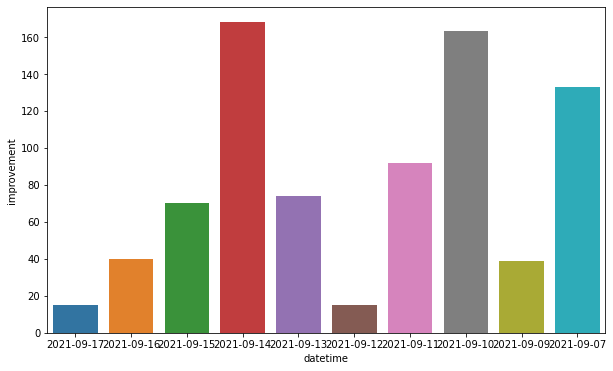

In [59]:
fig = plt.figure(figsize=(10,6))
sns.barplot(data=calendar_df, x='datetime', y='improvement', estimator=sum, ci=None)

## Get Language Details

In [60]:
lingo.get_language_details('Chinese')

{'streak': 9,
 'language_string': 'Chinese',
 'points': 809,
 'learning': True,
 'language': 'zs',
 'level': 7,
 'current_learning': True,
 'sentences_translated': 0,
 'to_next_level': 316}

## Get Language Progress

In [61]:
lingo.get_language_progress('zs')

{'streak': 9,
 'language_string': 'Chinese',
 'level_progress': 59,
 'num_skills_learned': 15,
 'level_percent': 15,
 'level_points': 375,
 'points_rank': 1,
 'next_level': 8,
 'level_left': 316,
 'language': 'zs',
 'points': 809,
 'fluency_score': 0.0,
 'level': 7}

## Get Topics

In [62]:
print(lingo.get_known_topics('zs'))

['Phrases 2', 'Numbers', 'Occupation', 'Greeting 3', 'Phrases 1', 'Nationality', 'Greeting 1', 'Contact', 'Name', 'Location 1', 'Family 1', 'Greeting 2', 'Food 1']


In [63]:
print(lingo.get_unknown_topics('zs'))

['Future', 'Hobbies 2', 'Dining 1', 'Supermarket', 'Drink', 'Travel', 'Work 3', 'Invitiation 1', 'Duo', 'Shopping 4', 'Environment', 'Body Parts', 'Sports 2', 'Hobbies 3', 'Internet Slang', 'Gourmet 2', 'Family 3', 'Exam', 'Location 6', 'Travel 3', 'Communication 2', 'Time 3', 'Invitation 2', 'Time 4', 'Festivals', 'Gourmet 1', 'Daily Routine 2', 'Location 2', 'Food 3', 'House', 'Celebration', 'Daily Routine 1', 'Work 2', 'Languages 3', 'Existence', 'Shopping 1', 'People 1', 'Sports 1', 'Telephone', 'Shopping 2', 'Location 3', 'People 2', 'Shopping 3', 'Health 3', 'Business 2', 'Location 4', 'Travel 2', 'Languages', 'Languages 2', 'Time 1', 'Weather', 'Location 5', 'Personality and Feelings', 'Dining 2', 'Greeting 4', 'Culture', 'Travel 4', 'Emergency', 'Payment', 'Entertainment', 'Weather 2', 'Health 2', 'Business 1', 'Work', 'Time 2', 'Dining 3', 'Transportation', 'Health 1', 'Daily Routine 3', 'People 3', 'Hobbies 1', 'School 2', 'Restaurant', 'School', 'Family 2']


In [64]:
print(lingo.get_reviewable_topics('zs'))

['Phrases 1', 'Location 1', 'Family 1']


## Get Words

In [65]:
known_words = lingo.get_known_words('zs')
print(known_words)

['零', '高兴', '人', '早上', '吃', '是', '样', '请问', '她', '不', '名字', '三', '天', '那', '再', '汉语', '中国', '美', '叫', '美国', '怎', '纽约', '香港', '茶', '喝', '在', '九', '百', '妈', '都', '关', '哪儿', '中', '不客气', '英国', '京', '爸爸', '英语', '爸', '吗', '高', '电', '儿', '哪', '起', '道', '怎么样', '学', '问', '谢', '字', '见', '生', '没', '识', '认识', '很', '多少', '上', '对不起', '知', '面', '妈妈', '学生', '号', '认', '少', '明', '再见', '他们', '一', '客', '多', '谢谢', '个', '英', '好', '水', '华', '饭', '说', '也', '的', '兴', '我们', '家', '谁', '七', '请', '这', '忙', '他', '你', '名', '知道', '话', '没关系', '你们', '张', '北京', '早', '气', '家人', '我', '号码', '李', '今', '电话', '八', '今天', '什么', '纽', '汉', '元', '北', '五', '码', '鱼', '十', '爱', '国']


## Get Learned Skills

In [66]:
lingo.get_learned_skills('zs')

[{'language_string': 'Chinese',
  'dependencies_name': [],
  'practice_recommended': False,
  'disabled': False,
  'test_count': 3,
  'missing_lessons': 0,
  'skill_progress': {'level': 1},
  'lesson': False,
  'has_explanation': True,
  'url_title': 'Greeting',
  'icon_color': 'green',
  'category': '',
  'num_lessons': 2,
  'strength': 1.0,
  'beginner': True,
  'title': 'Greeting 1',
  'num_levels': 5,
  'coords_y': 1,
  'coords_x': 2,
  'progress_level_session_index': 0,
  'id': '33f1d8ceebf80f5baa5ca305afdcd399',
  'level_sessions_finished': 0,
  'levels_finished': 1,
  'test': True,
  'lesson_number': 1,
  'learned': True,
  'num_translation_nodes': 0,
  'achievements': [],
  'description': '',
  'index': 0,
  'bonus': False,
  'locked': False,
  'explanation': '<p>There are four main tones and one neutral tone in Mandarin Chinese to distinguish words and grammatical uses. </p>\n<table>\n<thead>\n<tr>\n<th>Tone</th>\n<th>Tone mark</th>\n<th>Pronunciation</th>\n</tr>\n</thead>\n<t

## Get Vocabulary

In [67]:
vocab = lingo.get_vocabulary()
vocab

{'language_string': 'Chinese',
 'learning_language': 'zs',
 'from_language': 'en',
 'language_information': {'pronoun_mapping': [], 'tenses': {}},
 'vocab_overview': [{'strength_bars': 4,
   'infinitive': None,
   'normalized_string': '[?] Hui Er ',
   'pos': None,
   'last_practiced_ms': 1631842528000,
   'skill': 'Greeting 4',
   'related_lexemes': [],
   'last_practiced': '2021-09-17T01:35:28Z',
   'strength': 0.874856,
   'skill_url_title': 'Greeting-4',
   'gender': None,
   'id': '3466f103d9713e1b51342ef33e36ea65',
   'lexeme_id': '3466f103d9713e1b51342ef33e36ea65',
   'word_string': '一会儿'},
  {'strength_bars': 4,
   'infinitive': None,
   'normalized_string': 'Jian ',
   'pos': None,
   'last_practiced_ms': 1631842528000,
   'skill': 'Greeting 4',
   'related_lexemes': [],
   'last_practiced': '2021-09-17T01:35:28Z',
   'strength': 0.874856,
   'skill_url_title': 'Greeting-4',
   'gender': None,
   'id': '1e17b5ecb7b92995e3e5bd87d3bded2f',
   'lexeme_id': '1e17b5ecb7b92995e3e5bd

In [71]:
vocab_data = []
for word in vocab['vocab_overview']:
    vocab_data.append([word['normalized_string'].strip(), word['word_string'], word['strength'], word['skill_url_title']])

vocab_df = pd.DataFrame(vocab_data, columns=['word', 'character', 'strength', 'skill'])
vocab_df.sort_values(by='strength', inplace=True)

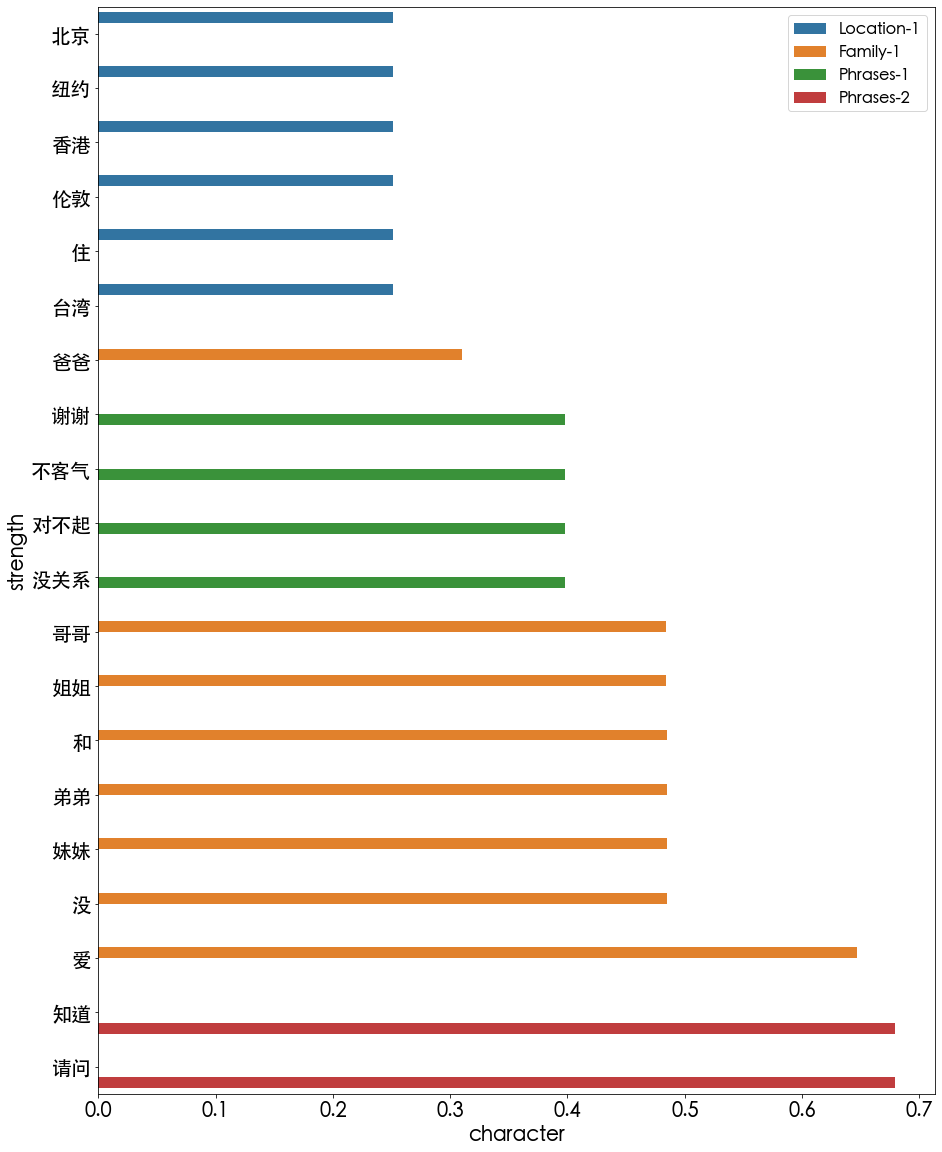

In [84]:
fig = plt.figure(figsize=(15,20))
ax = sns.barplot(x="strength", y="character", data=vocab_df.iloc[:20],
                 hue='skill', ci=None)
plt.xticks(fontsize=20);
plt.yticks(fontsize=20);
plt.xlabel('character', fontsize=20);
plt.ylabel('strength', fontsize=20);
plt.legend(fontsize=16);